# Convergent Cross Mapping Vegetation/Climate across different land cover types in East Africa 

In [26]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

In [5]:
from pyEDM import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from labellines import labelLine, labelLines
import re
import itertools
import seaborn as sns
sns.set(style='ticks', color_codes = True)

In [9]:
TS_DIR = '/home/rgreen/DroughtEDM/Data/EA_TS_16/Final/'

In [30]:
def ccm_vars_plot(in_dir, file, E, tau, Tp, libsize, sample, title):
    '''
    This function evaluates the cross map skill between two variables for a given land cover and area.
    
    Args:
    in_dir = path to directory of time series datasets
    lc = filename
    train = number of points in the time series to use for training, range separated by a space
    test = number of points in the time series to use for testing, range separated by a space
    title = label for figure of the area and land cover tested
    
    '''
    column_names = list(itertools.combinations(['NDVI', 'P', 'LST'],2))
    for i in column_names: 
        ccm_result = CCM(pathIn = in_dir, dataFile = file, E = E, tau = tau, Tp = Tp, libSizes = libsize, sample = sample, columns = i[0], target = i[1], verbose = True, showPlot = False)
        #ccm_result2 = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, columns = i[1], target = i[0], showPlot = False)
        #fig, (ax1, ax2) = plt.subplots(1,2)
        fig = plt.figure(figsize= (10,8))
        plt.plot(ccm_result.LibSize, ccm_result[str(i[0])+':'+str(i[1])], label = i[0] + r'$\rightarrow$' + i[1])
        plt.plot(ccm_result.LibSize, ccm_result[str(i[1])+':'+str(i[0])], label = i[1] + r'$\rightarrow$' + i[0])
        plt.xlabel('Library Size')
        plt.ylabel('Correlation ' r'$\rho$')
        plt.ylim(0, 1, 0.1)
        plt.title('Convergent Cross Mapping ' + title)
        #labelLines(plt.gca().get_lines(), zorder=2.5)
        plt.legend(loc = 'lower right', fontsize = 8, title = 'Cross Mapped Variables \n (Original' + r'$\rightarrow$' + 'Target)')
        plt.show()
        

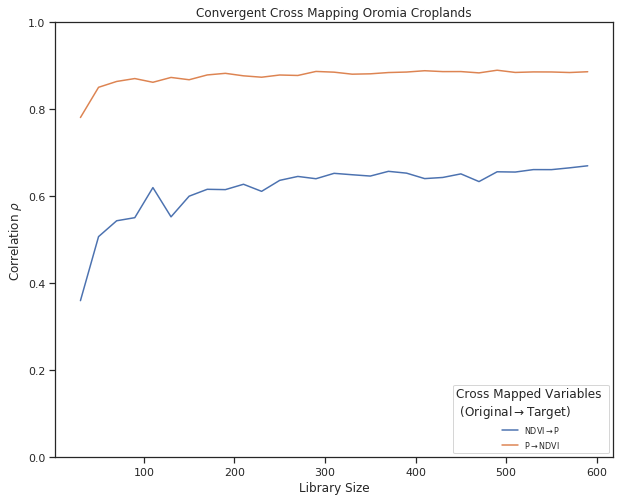

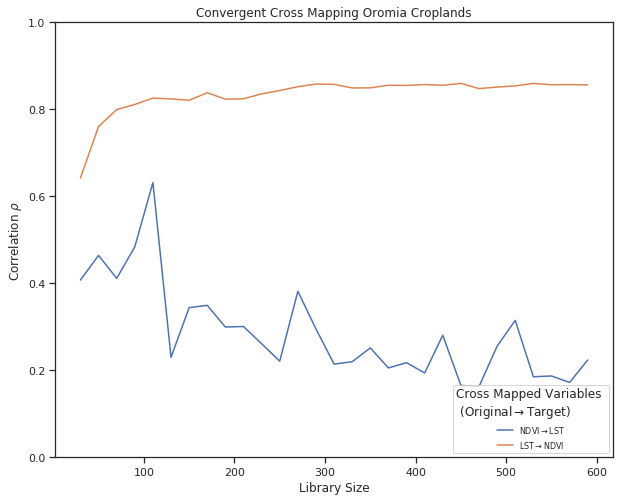

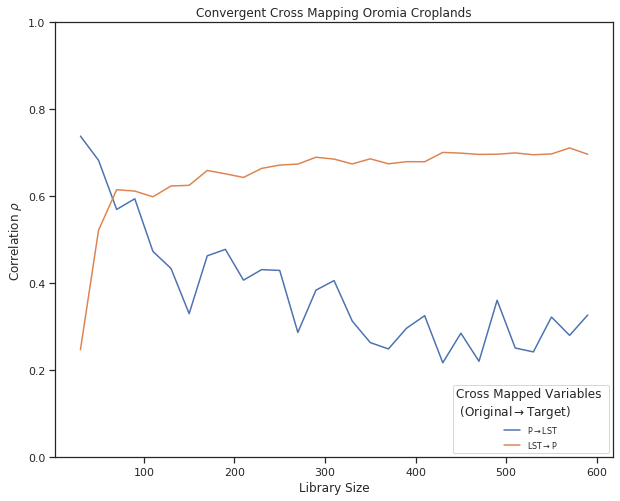

In [36]:
ccm_vars_plot(TS_DIR, 'ETH.8_1_ea_grassland.csv', 10, -1, 0, '10 600 20', 10, 'Oromia Croplands')

In [34]:
list(range(-8,4))

[-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3]

In [53]:
def ccm_tau(in_dir, file, E, Tp, libsize, sample, title, column, target):
    '''
    This function evaluates the cross map skill between two variables for a given land cover and area.
    
    Args:
    in_dir = path to directory of time series datasets
    lc = filename
    train = number of points in the time series to use for training, range separated by a space
    test = number of points in the time series to use for testing, range separated by a space
    title = label for figure of the area and land cover tested
    
    '''
    tau_lag =  list(range(-8,9))
    
    output = []
    for i in tau_lag: 
        print(i)
        ccm_result = CCM(pathIn = in_dir, dataFile = file, E = E, tau = i, Tp = Tp, libSizes = libsize, sample = sample, columns = column, target = target, verbose = True, showPlot = False)
        print(ccm_result.max())
        #fig = plt.figure(figsize= (10,8))
        #plt.plot(ccm_result.LibSize, ccm_result[str(i[0])+':'+str(i[1])], label = i[0] + r'$\rightarrow$' + i[1])
       
        

In [54]:
ccm_tau(TS_DIR, 'ETH.8_1_ea_grassland.csv', 10, 0, '10 500 20', 10, 'Oromia Croplands', 'NDVI', 'P')

-8
LibSize    490.00000
NDVI:P       0.69451
P:NDVI       0.71900
dtype: float64
-7
LibSize    490.000000
NDVI:P       0.697786
P:NDVI       0.741040
dtype: float64
-6
LibSize    490.000000
NDVI:P       0.693360
P:NDVI       0.716432
dtype: float64
-5
LibSize    490.000000
NDVI:P       0.691454
P:NDVI       0.765385
dtype: float64
-4
LibSize    490.000000
NDVI:P       0.696655
P:NDVI       0.779883
dtype: float64
-3
LibSize    490.000000
NDVI:P       0.699070
P:NDVI       0.811649
dtype: float64
-2
LibSize    490.000000
NDVI:P       0.685110
P:NDVI       0.859135
dtype: float64
-1
LibSize    490.000000
NDVI:P       0.664163
P:NDVI       0.889603
dtype: float64
0


RuntimeError: Parameters::Validate(): tau must be non-zero.


In [32]:
#only run if you need to it taks a long time!!!
#increasing the sample size will smooth the plots but run slower


#ccm_vars_plot (OROMIA_TS_DS, 'oromia_croplands_df_ds.csv', 10, -1, 0, '10 480 20', 500, 'Oromia Croplands')

In [56]:
def ccm_vars_df(in_dir, file, E, tau, Tp, libsize, sample, title):
    '''
    This function creates dataframes of CCM results
    
    '''
    column_names = list(itertools.combinations(['NDVI', 'P', 'LST'],2))
    output = pd.DataFrame(list(range(1,26)), columns=['LibSize'])
     
    
    for i in column_names: 
        ccm_result1 = CCM(pathIn = in_dir, dataFile = file, E = E, tau = tau, Tp = Tp, libSizes = libsize, sample = sample, columns = i[0], target = i[1], verbose = True, showPlot = False)
        ccm_result2 = CCM(pathIn = in_dir, dataFile = file, E = E, tau = tau, Tp = Tp, libSizes = libsize, sample = sample, columns = i[1], target = i[0], verbose = True, showPlot = False)
        #ccm_result2 = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, columns = i[1], target = i[0], showPlot = False)
        #fig, (ax1, ax2) = plt.subplots(1,2)
        col1 = i[0] + r'$\rightarrow$' + i[1]
        col2 = i[1] + r'$\rightarrow$' + i[0]
        output[col1] = ccm_result1[str(i[0])+':'+str(i[1])]
        output[col2] = ccm_result2[str(i[1])+':'+str(i[0])] 
        
    return output 
        
#         plt.plot(ccm_result.LibSize, ccm_result[str(i[0])+':'+str(i[1])], label = i[0] + r'$\rightarrow$' + i[1])
#         plt.plot(ccm_result.LibSize, ccm_result[str(i[1])+':'+str(i[0])], label = i[1] + r'$\rightarrow$' + i[0])
        

In [59]:
ccm_combos = ccm_vars_df(TS_DIR, 'ETH.8_1_ea_grassland.csv', 10, -1, 0, '10 480 20', 10, 'Oromia Croplands')
ccm_combos

,LibSize,NDVI$\rightarrow$P,P$\rightarrow$NDVI,NDVI$\rightarrow$LST,LST$\rightarrow$NDVI,P$\rightarrow$LST,LST$\rightarrow$P
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.344167,0.786886,0.437716,0.703875,0.771782,0.434415
2,3,0.581263,0.829094,0.603633,0.745177,0.595221,0.544928
3,4,0.567748,0.849124,0.538020,0.776753,0.472903,0.521268
4,5,0.574243,0.866321,0.539004,0.815267,0.387683,0.556352
5,6,0.569314,0.864640,0.344486,0.811174,0.495266,0.619605
6,7,0.591753,0.872696,0.365557,0.805269,0.370839,0.638515
7,8,0.646795,0.882025,0.360932,0.814164,0.538700,0.621574
8,9,0.616498,0.871485,0.335393,0.829118,0.423998,0.647303
9,10,0.582671,0.875580,0.333989,0.826261,0.278338,0.662948


In [70]:
def end_ccm(df):
    
    '''
    This function finds the maximum value in every ccm combination across the library size. 
    
    Args:
    df = dataframe of all ccm combination rho outputs
    
    '''        
    columns = df.columns[1:]
    #output = pd.DataFrame(list(range(1,31)), columns=['xmap'])
    output = []
    
    for i in columns:
        ccm_rho = df[i]
        
        last_rho = ccm_rho.iloc[-2]
        output.append(last_rho)
    return output

def diff_ccm(max_list):
    '''
    This function takes the difference between the maximum values of each ccm combination and creates a new dataframe
    
    Args:
    max_list = list of maximum values from ccm outputs
    
    '''        
    
    diff_df = pd.DataFrame()
    var_names = list(itertools.combinations(['NDVI', 'P', 'LST'],2))
    it = iter(max_list)
    
    diff_list = []
    for a, b in zip(it, it):
        diff1 = a-b
        diff2 = b-a
        diff_list.append(diff1)
        diff_list.append(diff2)
        diff_df['xmap'] = list(ccm_combos.columns[1:])
    
    diff_df['xmap'] = list(ccm_combos.columns[1:])
    diff_df['max_diff']= diff_list

    return diff_df
        


        
        

In [71]:
end_ccm(ccm_combos)

[0.6658876366349176,
 0.8830966078619639,
 0.3193689799638043,
 0.8552616833914163,
 0.25626527397515186,
 0.6920750351999686]

In [36]:
def max_ccm(df):
    
    '''
    This function finds the maximum value in every ccm combination across the library size. 
    
    Args:
    df = dataframe of all ccm combination rho outputs
    
    '''        
    columns = df.columns[1:]
    #output = pd.DataFrame(list(range(1,31)), columns=['xmap'])
    output = []
    
    for i in columns:
        ccm_rho = df[i]
        max_rho = ccm_rho.max()
        output.append(max_rho)
    return output

def diff_max_ccm(max_list):
    '''
    This function takes the difference between the maximum values of each ccm combination and creates a new dataframe
    
    Args:
    max_list = list of maximum values from ccm outputs
    
    '''        
    
    diff_df = pd.DataFrame()
    var_names = list(itertools.combinations(['NDVI', 'SM', 'TMP', 'P', 'LST', 'refET'],2))
    it = iter(max_list)
    
    diff_list = []
    for a, b in zip(it, it):
        diff1 = a-b
        diff2 = b-a
        diff_list.append(diff1)
        diff_list.append(diff2)
        diff_df['xmap'] = list(ccm_combos.columns[1:])
    
    diff_df['xmap'] = list(ccm_combos.columns[1:])
    diff_df['max_diff']= diff_list

    return diff_df
        


        
        

In [40]:
maxdiff_combos.columns.str.split('_').str[0]

Index(['xmap', 'max'], dtype='object')

In [61]:
def get_target_var(xmap_string):
    return xmap_string.split("$\\rightarrow$",1)[0]
def get_causal_var(xmap_string):
    return xmap_string.split("$\\rightarrow$",1)[1]


In [62]:
maxdiff_combos_sorted = maxdiff_combos.sort_values('xmap')
maxdiff_combos_sorted['causal_var'] = (maxdiff_combos_sorted['xmap'].map(get_causal_var))
maxdiff_combos_sorted['target_var'] = (maxdiff_combos_sorted['xmap'].map(get_target_var))

#maxdiff_combos_sorted.join(maxdiff_combos_sorted.xmap.apply(lambda s: pd.Series({'target_var':s.split('rightarrow$', 1)[1]})))
                                                                                                      #', 'causal_var':s-1})))'
#maxdiff_combos_sorted.insert(1, 'target_var', ['LST']*5 + ['NDVI']*5 + ['P']*5 + ['SM']*5 + ['TMP']*5 + ['refET']*5)
#maxdiff_combos_sorted['causal_var'] = maxdiff_combos_sorted.apply(lambda row: add())

#maxdiff_combos_sorted.join(maxdiff_combos_sorted['xmap'].apply(lambda s: pd.Series({'causal_var':s.split("rightarrow$",1)[1]})))
#maxdiff_combos_sorted.insert(2, 'causal_var', (maxdiff_combos_sorted['xmap'].values.split("rightarrow$",1)[1]))
maxdiff_combos_sorted

#maxdiff_combos[maxdiff_combos['xmap'].str.startswith('NDVI')]

,xmap,max_diff,causal_var,target_var
7,LST$\rightarrow$NDVI,0.345077,NDVI,LST
25,LST$\rightarrow$P,0.024124,P,LST
15,LST$\rightarrow$SM,0.019434,SM,LST
21,LST$\rightarrow$TMP,-0.033932,TMP,LST
28,LST$\rightarrow$refET,-0.050782,refET,LST
6,NDVI$\rightarrow$LST,-0.345077,LST,NDVI
4,NDVI$\rightarrow$P,-0.316824,P,NDVI
0,NDVI$\rightarrow$SM,-0.241840,SM,NDVI
2,NDVI$\rightarrow$TMP,-0.131020,TMP,NDVI
8,NDVI$\rightarrow$refET,-0.410750,refET,NDVI


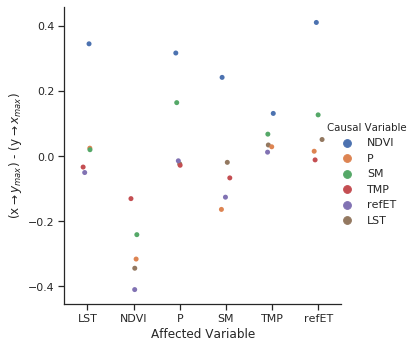

In [73]:
#plt1 = 
ax = sns.catplot(x='target_var', y='max_diff', hue = 'causal_var', data = maxdiff_combos_sorted)
ax.set(xlabel = 'Affected Variable', ylabel = '(x$\\rightarrow$$y_{max}$) - (y$\\rightarrow$$x_{max}$)')
ax._legend.set_title('Causal Variable')

# for line in range(0,df.shape[0]):
#      plt1.text(maxdiff_combos_sorted.target_var[line]+0.2, maxdiff_combos_sorted.max_diff[line], maxdiff_combos_sorted.xmap[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
        
# sns.plt.show()

In [44]:
ex_string = maxdiff_combos_sorted.iloc[0, 0]
ex_string

'LST$\\rightarrow$NDVI'

In [59]:
print(ex_string.split("$\\rightarrow$",1)[0])

LST
